#### **Regression-Analysis-Team-Project** by Team 1

##### Importing necessary libraries

In [2]:
####### what's in startup file #######
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
# import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'nbAgg' by the following code:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 657, in launch_instance
    app.initialize(argv)
  File "<decorator-gen-124>", line 2, in initialize
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 87, in catch_config_error


In [3]:
####### what's not in startup file #######
from scipy import stats

# visualization in jupyter
%matplotlib inline   

# ignore warning messeges
import warnings
warnings.filterwarnings('ignore')

import time

##### Importing data
- Properties Data

In [4]:
prop16 = pd.read_csv('data/properties_2016.csv')
prop17 = pd.read_csv('data/properties_2017.csv')

- Train Data

In [5]:
train16 = pd.read_csv('data/train_2016_v2.csv', parse_dates=["transactiondate"])
train17 = pd.read_csv('data/train_2017.csv', parse_dates=["transactiondate"])

- Submission Sample

In [6]:
submission_form = pd.read_csv('data/sample_submission.csv')

In [7]:
# traing16을 기준으로 prop16을 merge
merged16 = pd.merge(train16, prop16, on="parcelid", how="left")

In [8]:
# traing17을 기준으로 prop17을 merge
merged17 = pd.merge(train17, prop17, on="parcelid", how="left")

In [9]:
merged = pd.concat([merged16, merged17]).reset_index(drop=True)
merged.tail()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
167883,10833991,-0.002245,2017-09-20,1.0,NaN,NaN,3.0,3.0,NaN,8.0,...,NaN,NaN,265000.0,379000.0,2016.0,114000.0,4685.34,NaN,NaN,6.037132e+13
167884,11000655,0.020615,2017-09-20,NaN,NaN,NaN,2.0,2.0,NaN,6.0,...,NaN,NaN,70917.0,354621.0,2016.0,283704.0,4478.43,NaN,NaN,6.037101e+13
167885,17239384,0.013209,2017-09-21,NaN,NaN,NaN,2.0,4.0,NaN,NaN,...,1.0,NaN,50683.0,67205.0,2016.0,16522.0,1107.48,NaN,NaN,6.111008e+13
167886,12773139,0.037129,2017-09-21,1.0,NaN,NaN,1.0,3.0,NaN,4.0,...,NaN,NaN,32797.0,49546.0,2016.0,16749.0,876.43,NaN,NaN,6.037434e+13
167887,12826780,0.007204,2017-09-25,NaN,NaN,NaN,2.0,3.0,NaN,6.0,...,NaN,NaN,140000.0,522000.0,2016.0,382000.0,6317.15,NaN,NaN,6.037503e+13


In [10]:
merged_des = merged.describe(include='all').transpose()
merged_des["missing_ratio"] = 1-(merged_des["count"]/merged.shape[0])
merged_des["dtype"] = merged.dtypes
merged_des.reset_index().tail()

,index,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max,missing_ratio,dtype
55,landtaxvaluedollarcnt,167851,NaN,NaN,NaN,NaN,NaN,288880,445645,22,83730,197776,355334,4.89522e+07,0.000220385,float64
56,taxamount,167843,NaN,NaN,NaN,NaN,NaN,5989.52,7214.73,19.92,2798.07,4501.04,6914.16,586639,0.000268036,float64
57,taxdelinquencyflag,4683,1,Y,4683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.972106,object
58,taxdelinquencyyear,4683,NaN,NaN,NaN,NaN,NaN,13.8272,2.42166,3,13,14,15,99,0.972106,float64
59,censustractandblock,167002,NaN,NaN,NaN,NaN,NaN,6.04939e+13,1.05414e+12,6.0371e+13,6.03731e+13,6.0376e+13,6.05904e+13,4.8303e+14,0.00527733,float64


##### Data의 format 등에 먼저 전처리를 해줄 수 있는 부분

In [11]:
# transaction date을 year와 month로 분리해 줌
merged['transaction_year'] = merged['transactiondate'].dt.year
merged['transaction_month'] = merged['transactiondate'].dt.month

# taxdelinquency는 "Y"를 True로 바꾸어 줌 (다른 dummy 변수들은 1이나 True로 되어 있음)
merged['taxdelinquencyflag'] = merged['taxdelinquencyflag'].replace('Y',True)
merged['taxdelinquencyflag'] = merged['taxdelinquencyflag'].fillna(False)

# taxdelinquencyyear는 4자리의 년도로 format을 맞춰줌
merged["taxdelinquencyyear"] = merged["taxdelinquencyyear"].apply(lambda x: x + 2000 if x <= 17 else x + 1900)

# 위도 경도를 원래 단위로 맞춰줌
merged["latitude"] = merged["latitude"]/1000000
merged["longitude"] = merged["longitude"]/1000000

##### categorical / numerical variable 구분하기

In [12]:
vars = merged_des.reset_index()["index"].tolist()

cat_vars = ['transactiondate', 'transaction_year', 'transaction_month',
            'rawcensustractandblock', 'censustractandblock', 'fips',
            'regionidcity', 'regionidcounty', 'regionidneighborhood', 'regionidzip', 
            'architecturalstyletypeid', 'decktypeid', 'buildingclasstypeid', 'storytypeid',
            'typeconstructiontypeid', 'propertycountylandusecode', 'propertylandusetypeid',
            'propertyzoningdesc', 'taxdelinquencyflag', 'taxdelinquencyyear', 'assessmentyear',
            'heatingorsystemtypeid', 'airconditioningtypeid', 'hashottuborspa', 'fireplaceflag',
            'pooltypeid10', 'pooltypeid2', 'pooltypeid7']

num_vars = [i for i in vars if i not in cat_vars]

num_vars.remove('parcelid')
num_vars.remove('logerror')

print("number of categorical variables:", len(cat_vars))
print("number of numerical variables:", len(num_vars))

number of categorical variables: 28
number of numerical variables: 32


##### 카테고리 변수 중 float type이 많음 → 필요할 경우 str으로 바꿔주기
- str: 'architecturalstyletypeid', 'rawcensustractandblock', 'censustractandblock', 'regionidcounty', 'fips', 'regionidcity', 'regionidcounty', 'regionidneighborhood', 'decktypeid', 'buildingclasstypeid', 'storytypeid', 'typeconstructiontypeid', 'propertylandusetypeid', 'heatingorsystemtypeid', 'airconditioningtypeid'
    - 일단 년도 변수는 계산 등의 조작 가능성을 고려해 바꿔주지 않음: 'assessmentyear', 'taxdelinquencyyear'
- boolean: 'fireplaceflag', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'hashottuborspa'

In [13]:
def cat_to_str(column_name):
    merged[column_name] = merged[column_name].astype("str")
    merged[column_name][merged[column_name] == 'nan'] = np.nan

In [14]:
ls_c_to_s = ['architecturalstyletypeid', 'rawcensustractandblock', 'censustractandblock',
             'regionidcounty', 'fips', 'regionidcity', 'regionidcounty', 'regionidneighborhood',
             'decktypeid', 'buildingclasstypeid', 'storytypeid', 'typeconstructiontypeid',
             'propertylandusetypeid', 'heatingorsystemtypeid', 'airconditioningtypeid']

for var in ls_c_to_s:
    cat_to_str(var)

In [15]:
# dummy 변수를 True/False로 인코딩
def cat_to_bln(column_name):
    merged[column_name] = merged[column_name].replace(1,True)
    merged[column_name] = merged[column_name].fillna(False)

In [16]:
c_to_b = ['fireplaceflag', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'hashottuborspa']

for var in c_to_b:
    cat_to_bln(var)

In [17]:
merged_des = merged.describe(include='all').transpose()
merged_des["missing_ratio"] = 1-(merged_des["count"]/merged.shape[0])
merged_des["dtype"] = merged.dtypes
merged_des

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max,missing_ratio,dtype
parcelid,167888,NaN,NaN,NaN,NaN,NaN,1.29954e+07,3.01607e+06,1.07117e+07,1.1549e+07,1.25406e+07,1.42193e+07,1.67689e+08,0,int64
logerror,167888,NaN,NaN,NaN,NaN,NaN,0.0139063,0.165706,-4.65542,-0.0253,0.006,0.0392,5.263,0,float64
transactiondate,167888,616,2017-06-30 00:00:00,1195,2016-01-01 00:00:00,2017-09-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,datetime64[ns]
airconditioningtypeid,53788,6,1.0,49854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.67962,object
architecturalstyletypeid,468,6,7.0,394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.997212,object
basementsqft,93,NaN,NaN,NaN,NaN,NaN,695.376,583.952,38,280,588,819,3560,0.999446,float64
bathroomcnt,167854,NaN,NaN,NaN,NaN,NaN,2.28827,1.00084,0,2,2,3,20,0.000202516,float64
bedroomcnt,167854,NaN,NaN,NaN,NaN,NaN,3.04174,1.14913,0,2,3,4,16,0.000202516,float64
buildingclasstypeid,31,2,4.0,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999815,object
buildingqualitytypeid,107173,NaN,NaN,NaN,NaN,NaN,6.01546,1.8828,1,4,7,7,12,0.36164,float64


## 2.2 Exploring Target Variable: logerror

In [18]:
# cencus와 rawcensus의 앞 네자리로 변수를 만들고 다른 변수들과 묶기
merged["census_1"] = merged["censustractandblock"].astype("str").apply(lambda x: x[:4])
merged["census_1"][merged["census_1"] == 'nan'] = np.nan
merged["raw_census_1"] = merged["rawcensustractandblock"].astype("str").apply(lambda x: x[:4])
merged["raw_census_1"][merged["raw_census_1"] == 'nan'] = np.nan
county_df = merged[["fips", "regionidcounty", "census_1", "raw_census_1","logerror"]].tail()
county_df.tail()

,fips,regionidcounty,census_1,raw_census_1,logerror
167883,6037.0,3101.0,6037,6037,-0.002245
167884,6037.0,3101.0,6037,6037,0.020615
167885,6111.0,2061.0,6111,6111,0.013209
167886,6037.0,3101.0,6037,6037,0.037129
167887,6037.0,3101.0,6037,6037,0.007204


In [19]:
# censustractandblock & rawcensustractandblock의 5-10자리 부분: census tract → class가 3000개 이상이라 너무 많은 것으로 생각됨
merged["census_2"] = merged["censustractandblock"].astype("str").apply(lambda x: x[4:10])
merged["census_2"][merged["census_2"] == ""] = np.nan
census_2 = pd.DataFrame(merged["census_2"])
census_2 = census_2.groupby("census_2").size().reset_index(name='counts')

merged["raw_census_2"] = merged["rawcensustractandblock"].astype("str").apply(lambda x: x[4:11])
merged["raw_census_2"][merged["raw_census_2"] == ""] = np.nan
raw_census_2 = pd.DataFrame(merged["raw_census_2"])
raw_census_2 = raw_census_2.groupby("raw_census_2").size().reset_index(name='counts')

In [20]:
# censustractandblock & rawcensustractandblock의 5-10자리 부분 중 첫째 자리로 카테고리화 (카테고리 수를 줄임)
merged["census_3"] = merged["censustractandblock"].astype("str").apply(lambda x: x[4:5])
merged["census_3"][merged["census_3"] == ''] = np.nan
census_3 = pd.DataFrame(merged["census_3"])
census_3 = census_3.groupby("census_3").size().reset_index(name='counts')

merged["raw_census_3"] = merged["rawcensustractandblock"].astype("str").apply(lambda x: x[4:5])
merged["raw_census_3"][merged["raw_census_3"] == ''] = np.nan
raw_census_3 = pd.DataFrame(merged["raw_census_3"])
raw_census_3 = raw_census_3.groupby("raw_census_3").size().reset_index(name='counts')

In [21]:
# censustractandblock & rawcensustractandblock의 1-5자리로 카테고리화
merged["census_4"] = merged["censustractandblock"].astype("str").apply(lambda x: x[:5])
merged["census_4"][merged["census_4"] == 'nan'] = np.nan
census_4 = pd.DataFrame(merged["census_4"])
census_4 = census_4.groupby("census_4").size().reset_index(name='counts')

merged["raw_census_4"] = merged["rawcensustractandblock"].astype("str").apply(lambda x: x[:5])
merged["raw_census_4"][merged["raw_census_4"] == 'nan'] = np.nan
raw_census_4 = pd.DataFrame(merged["raw_census_4"])
raw_census_4 = raw_census_4.groupby("raw_census_4").size().reset_index(name='counts')

In [22]:
### 입력오류라고 보고 NaN값 처리
merged["regionidzip"][merged["regionidzip"]>=100000] = np.nan

In [23]:
# 첫글자로 새로운 변수 만들기 (첫 글자로 카테고리화)
merged["propertyzoningdesc_1"] = merged["propertyzoningdesc"].astype("str").apply(lambda x: x[:1])
merged["propertyzoningdesc_1"][merged["propertyzoningdesc_1"] == "n"] = np.nan

In [24]:
# 세번째 글자로 새로운 변수 만들기
merged["propertyzoningdesc_3"] = merged["propertyzoningdesc"].astype("str").apply(
    lambda x: x.replace("&", "").replace("-", "").replace(" ", ""))
merged["propertyzoningdesc_3"] = merged["propertyzoningdesc_3"].apply(lambda x: x[2:3])
merged["propertyzoningdesc_3"][merged["propertyzoningdesc_3"] == "n"] = np.nan
merged["propertyzoningdesc_3"][merged["propertyzoningdesc_3"] == ""] = np.nan

In [75]:
merged["taxdelinquencyyear_past"] = merged["transaction_year"] - merged["taxdelinquencyyear"]

## **3. Feature Engineering**

### 3.1 Missing Values

#### 3.1.1 Status of missing values
- 데이터에 missing value가 상당히 많음, missing value의 비중을 높은 순으로 살펴보자

In [26]:
merged_missing = pd.DataFrame(merged_des["missing_ratio"].sort_values(ascending=False))
merged_missing.reset_index()

,index,missing_ratio
0,buildingclasstypeid,0.999815
1,finishedsquarefeet13,0.999553
2,storytypeid,0.999446
3,basementsqft,0.999446
4,yardbuildingsqft26,0.999017
5,architecturalstyletypeid,0.997212
6,typeconstructiontypeid,0.996891
7,finishedsquarefeet6,0.995193
8,decktypeid,0.992424
9,poolsizesum,0.989052


#### 3.1.3 Missing Values processing

#### 일부 변수 추가 후 categorical / numerical 새로 분류
- poolcnt는 dummy variable로 재분류함 (True/False)

In [82]:
merged_1 = merged.copy()
merged_1.tail()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,raw_census_1,census_2,raw_census_2,census_3,raw_census_3,census_4,raw_census_4,propertyzoningdesc_1,propertyzoningdesc_3,taxdelinquencyyear_past
167883,10833991,-0.002245,2017-09-20,1.0,NaN,NaN,3.0,3.0,NaN,8.0,...,6037,131900,1319.00,1,1,60371,60371,L,R,NaN
167884,11000655,0.020615,2017-09-20,NaN,NaN,NaN,2.0,2.0,NaN,6.0,...,6037,101400,1014.00,1,1,60371,60371,L,R,NaN
167885,17239384,0.013209,2017-09-21,NaN,NaN,NaN,2.0,4.0,NaN,NaN,...,6111,008402,0084.02,0,0,61110,61110,NaN,NaN,NaN
167886,12773139,0.037129,2017-09-21,1.0,NaN,NaN,1.0,3.0,NaN,4.0,...,6037,433802,4338.02,4,4,60374,60374,S,R,NaN
167887,12826780,0.007204,2017-09-25,NaN,NaN,NaN,2.0,3.0,NaN,6.0,...,6037,503402,5034.02,5,5,60375,60375,W,R,NaN


In [84]:
vars = merged_des.reset_index()["index"].tolist()
vars.append("taxdelinquencyyear_past")

cat_vars = ['transactiondate',"transaction_year", "transaction_month", 'fips',
            'rawcensustractandblock', 'censustractandblock', "raw_census_1", "census_1",
            "raw_census_2", "census_2", "raw_census_3", "census_3", "raw_census_4", "census_4",
            'regionidcounty', 'regionidcity', 'regionidzip', 'regionidneighborhood', 'architecturalstyletypeid',
            'decktypeid', 'buildingqualitytypeid', 'buildingclasstypeid', 
            'storytypeid', 'typeconstructiontypeid', 'propertycountylandusecode', 'propertylandusetypeid',
            'propertyzoningdesc', "propertyzoningdesc_1", "propertyzoningdesc_3",
            'taxdelinquencyflag', 'taxdelinquencyyear', 'assessmentyear',
            'heatingorsystemtypeid', 'airconditioningtypeid', 'hashottuborspa', 'fireplaceflag',
            'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'poolcnt']

num_vars = [i for i in vars if i not in cat_vars]

num_vars.remove('parcelid')
num_vars.remove('logerror')

print("number of categorical variables:", len(cat_vars))
print("number of numerical variables:", len(num_vars))

number of categorical variables: 40
number of numerical variables: 31


#### (1) numerical variables:

##### 집 면적에 관련된 실수 변수
- imputation을 어떻게 할 거라는 설명!

In [86]:
def num_imputation(df):
    for var in num_vars:
        if var in ["garagecarcnt", "numberofstories"]:
            df[var] = df[var].fillna(1)
        elif var in ["buildingqualitytypeid", "roomcnt", "bedroomcnt", "unitcnt", 'bathroomcnt', 
                     'calculatedbathnbr', 'fullbathcnt', 'threequarterbathnbr', 'yearbuilt']:
            a = df[var].mode()
            df[var] = df[var].fillna(int(a[0]))
        elif var in ['finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
                     'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
                     'finishedsquarefeet50', 'finishedsquarefeet6', 'garagetotalsqft', 'lotsizesquarefeet',
                     'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'taxamount',
                     'latitude', 'longitude']:
            df[var] = df[var].fillna(df[var].mean())
        else:    # ['poolsizesum', 'fireplacecnt', 'yardbuildingsqft17', 'yardbuildingsqft26', "poolsizesum","taxdelinquencyyear_past"]
            df[var] = df[var].fillna(0) 

In [87]:
num_imputation(merged_1)

#### (2) dummy/categorical variables:

In [89]:
def cat_imputation(df):
    for var in cat_vars:                  
        if var in ['taxdelinquencyyear', 'assessmentyear']:
            df[var] = df[var].fillna(0)
        elif var == "poolcnt":
            df[var] = df[var].replace(1, True)
            df[var] = df[var].fillna(False)            
        elif var == "decktypeid":
            df[var] = df[var].replace('66.0', True)
            df[var] = df[var].fillna(False)         
        else:
            a = df[var].mode()
            df[var] = df[var].fillna(a[0])

In [90]:
cat_imputation(merged_1)

#### (3) imputation 후 missing value ratio 다시 체크

In [91]:
merged_1_des = merged_1.describe(include='all').transpose()
merged_1_des["missing_ratio"] = 1-(merged_1_des["count"]/merged_1.shape[0])
merged_1_des["dtype"] = merged_1.dtypes
merged_1_missing = pd.DataFrame(merged_1_des["missing_ratio"].sort_values(ascending=False))
merged_1_missing.reset_index()

,index,missing_ratio
0,taxdelinquencyyear_past,0
1,propertylandusetypeid,0
2,fips,0
3,fireplacecnt,0
4,fullbathcnt,0
5,garagecarcnt,0
6,garagetotalsqft,0
7,hashottuborspa,0
8,heatingorsystemtypeid,0
9,latitude,0


### 3.2 Feature Correlation

#### 3.2.1 Numerical Features

In [36]:
num_df = merged_1[num_vars]

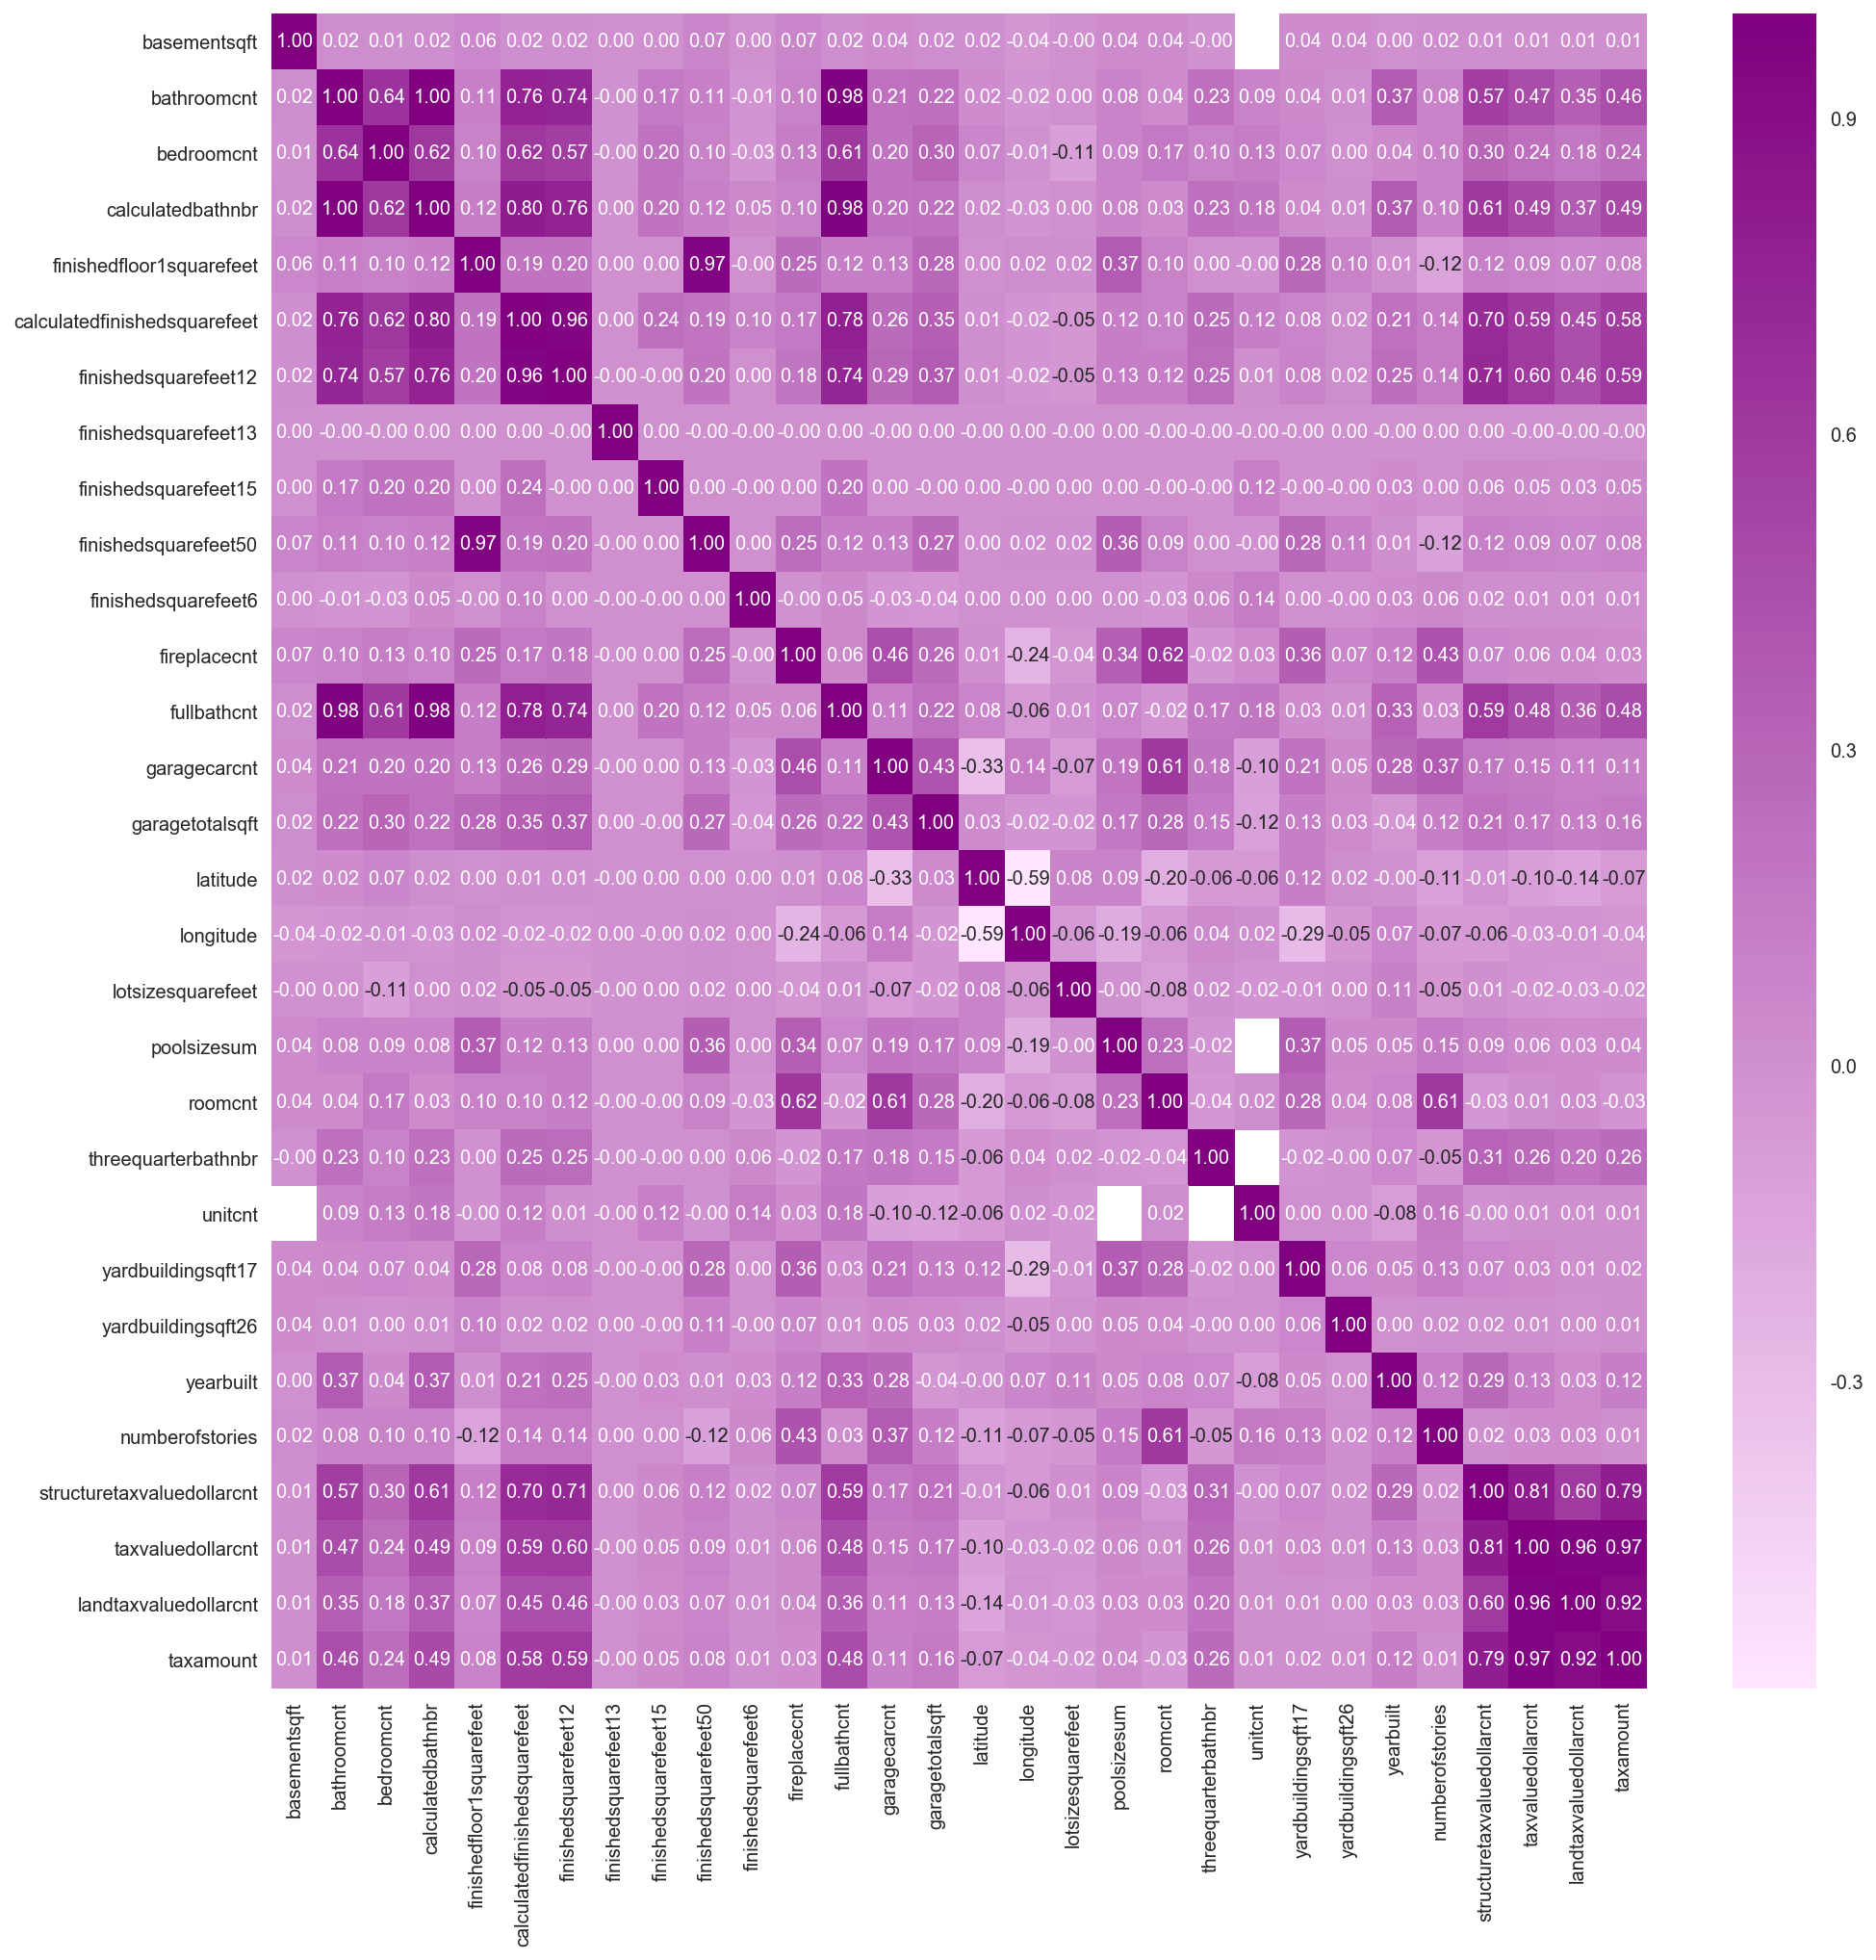

In [37]:
plt.figure(figsize=(16, 16))
cmap = sns.light_palette("purple", as_cmap=True)
sns.heatmap(num_df.corr(), annot=True, fmt='3.2f', cmap=cmap)
plt.show()

#### 3.2.2 Categorical Features

In [38]:
cat_df = merged_1[cat_vars]

### 3.3 Determination of outliers and variables using OLS model

#### 3.3.1 Model by all numerical Features

#### 3.3.2 Model by all categorical Features

#### 3.3.3 Model by numerical and categorical features together

#### 3.3.4 Model by high correlation coefficient numerical features with Logerror

#### 3.3.5 Model by high correlation coefficient numerical features and categorical features 

#### 3.3.6 Multi-collinearity and variance analysis between variables

##### (1) Multi-collinearity

##### (2) Analysis of variance on categorical features

#### 3.3.7 Comparison of model performance by using variables

### 3.4 Outlier

#### 1) Option1 : IQR (Interquartile Range)

#### 2) Option2 : Standardized resids

#### 3) Option3 : Cook's Distance

#### 4) Check all outliers (option 1,2,3)

#### 5) Combination of outliers groups

### 3.5 Data preprocessing

#### 3.5.1 Select numerical variables

#### 3.5.2 Select categorical variables

## **4. Modeling**

### 4.1. Input data

### 4.2 OLS(Ordinary Least Square) Model

#### 4.2.1 Make OLS Model

#### 4.2.2 ANOVA F-test

#### 4.2.3 RMSE

#### 4.2.4 Normalization of residuals

### 4.3 Predict Logerror